2022-07-15 test b

In [1]:
!python --version

Python 3.8.12


In [13]:
pip freeze

absl-py==1.0.0
alabaster==0.7.12
anyio==3.5.0
apex==0.1
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1618968359944/work
attrs==21.4.0
audioread==2.1.9
Babel==2.9.1
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1631087867185/work
black @ file:///home/conda/feedstock_root/build_artifacts/black-recipe_1643636307408/work
bleach==4.1.0
blis @ file:///home/conda/feedstock_root/build_artifacts/cython-blis_1636053204017/work
brotlipy @ file:///home/conda/feedstock_root/build_artifacts/brotlipy_1636012188166/work
cachetools==5.0.0
catalogue @ file:///home/conda/feedstock_root/build_artifacts/catalogue_1638867392804/work
certifi==2021.10.8
cffi @ file:///

Next, change directory to wherever you created your folder. 

In [6]:
!date
!pwd

Tue Jun 28 00:27:49 UTC 2022
/notebooks/ml639a/639c


In [4]:
!pwd
import os

# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/home/studio-lab-user/ml635e/ir'
WORKING_DIRECTORY = '/notebooks/ml639a/639c'
imgdir='/notebooks/imgdata/inrm4pyt'
imgtrain = '/notebooks/imgdata/inrm4pyt/train'
imgval = '/notebooks/imgdata/inrm4pyt/val'

os.chdir(WORKING_DIRECTORY)
!pwd

/notebooks/ml639a/639c
/notebooks/ml639a/639c


In [5]:
# List the contents of your working directory
# It should contain at least three folders: images, train_labels, and val_labels
!ls

c1.639.ir.ipynb


Now, let's install the Detecto package using pip. 

In [11]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 831.4 MB 20.5 MB/s eta 0:00:01  |                                | 20 kB 16.5 MB/s eta 0:00:51     |█████████████████▌              | 455.3 MB 23.2 MB/s eta 0:00:17     |█████████████████████████▊      | 669.0 MB 21.3 MB/s eta 0:00:08     |███████████████████████████     | 704.1 MB 25.9 MB/s eta 0:00:05     |███████████████████████████▎    | 708.9 MB 25.9 MB/s eta 0:00:05
     |████████████████████████████████| 22.1 MB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 50.6 MB/s eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0a0+17540c5
    Uninstalling torch-1.11.0a0+17540c5:
      Successfully uninstalled torch-1.11.0a0+17540c5
  Attempting uninstall: attrs
    Found existing installation: attrs 18.2.0
    Uninstalling attrs-18.2.0:
      Successfully uninstalled attrs-18.2.0
  Attempting uninstall: torchvision
    Fo

In [6]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 60.9 MB 25.3 MB/s eta 0:00:01


Import everything we need in the following code block:

In [8]:
%%bash
apt update
DEBIAN_FRONTEND=noninteractive apt-get install -y python3-opencv
#tz prompt. dpkg fix...
pip install opencv-python


Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1979 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [2420 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [881 kB]
Get:8 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [27.5 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1331 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1161 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [1411 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [30.3 kB]
Get:13 http://archi

In [12]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

AttributeError: partially initialized module 'cv2' has no attribute 'gapi_wip_gst_GStreamerPipeline' (most likely due to a circular import)

To check that everything's working, we can try reading in one of the images from our images folder. 

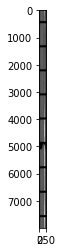

In [18]:
image = utils.read_image('images/inner_rim_210805T104053.png')
plt.imshow(image)
plt.show()

How cute! Now, we're ready to create our dataset and train our model. However, before doing so, it's a bit slow working with hundreds of individual XML label files, so we should convert them into a single CSV file to save time later down the line. 

In [13]:
# Do this twice: once for our trning labels and once for our validation labels
# /notebooks/imgdata/inrm4pyt/train.csv
utils.xml_to_csv('/notebooks/imgdata/inrm4pyt/train', 'train2.csv')

NameError: name 'utils' is not defined

In [19]:
utils.xml_to_csv('val', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,inner_rim_210805T104131.png,260,7990,Chip,1,1364,191,1694,0
1,inner_rim_210805T104053.png,260,7990,Chip,2,4899,192,5231,1
2,inner_rim_210805T104112.png,260,7990,Chip,1,4013,192,4332,2


Below, we create our dataset, applying a couple of transforms beforehand. These are optional, but they can be useful for augmenting your dataset without gathering more data. 

In [14]:
# Specify a list of transformations for our dataset to apply on our images
# transform_img = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Resize(800),
#     transforms.RandomHorizontalFlip(0.5),
#     transforms.ToTensor(),
#     utils.normalize_transform(),
# ])

dataset = core.Dataset('/notebooks/imgdata/inrm4pyt/train.csv', '/notebooks/imgdata/inrm4pyt/images/')

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

NameError: name 'core' is not defined

Finally, let's train our model! First, we create a DataLoader over our dataset to specify how we feed the images into our model. We also use our validation dataset to track the accuracy of the model throughout training. 

In [21]:
# Create our validation dataset
val_dataset = core.Dataset('/notebooks/imgdata/inrm4pyt/val.csv', '/notebooks/imgdata/inrm4pyt/images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['Chip'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=3, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 3
Begin iterating over training dataset


  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
  0%|          | 0/2 [00:02<?, ?it/s]


AssertionError: 

Let's see how well our model does on a couple images from our validation set:

In [11]:
images = []
# Create a list of images  from val_dataset
for i in range(0, 2, 1):
    image, _ = val_dataset[i]
    images.append(image)

# Plot a  grid of the model's predictions on our  images
visualize.plot_prediction_grid(model, images, dim=(1, 3), figsize=(33, 33))

ValueError: Grid dimensions do not match size of list of images

## Conclusion

Thanks for making it this far through the demo!

This is as far as the demo goes, but a great next step would be seeing how well the model works on a live video of Chihuahuas and Golden Retrievers in the same frame at the same time. To learn more about Detecto, be sure to check out the [Quickstart guide](https://detecto.readthedocs.io/en/latest/usage/quickstart.html), [Further Usage guide](https://detecto.readthedocs.io/en/latest/usage/further-usage.html), and [API docs](https://detecto.readthedocs.io/en/latest/api.html)!